## Steps to Reproduce

In [1]:
import geopandas as gpd
import mapclassify
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import BoundaryNorm

In [2]:
gdf = gpd.GeoDataFrame({
    'value': np.linspace(0, 100, 100),
    'geometry': gpd.points_from_xy(np.tile(np.arange(10), 10), np.repeat(np.arange(10), 10))
})
gdf.head()

,value,geometry
0,0.000000,POINT (0 0)
1,1.010101,POINT (1 0)
2,2.020202,POINT (2 0)
3,3.030303,POINT (3 0)
4,4.040404,POINT (4 0)


In [3]:
jenks = mapclassify.NaturalBreaks(gdf['value'], k=4)
breaks = jenks.bins

cmap = plt.get_cmap('inferno')
norm = BoundaryNorm(boundaries=breaks, ncolors=cmap.N)

print("NaturalBreaks bins:", breaks)

NaturalBreaks bins: [ 24.24242424  49.49494949  74.74747475 100.        ]


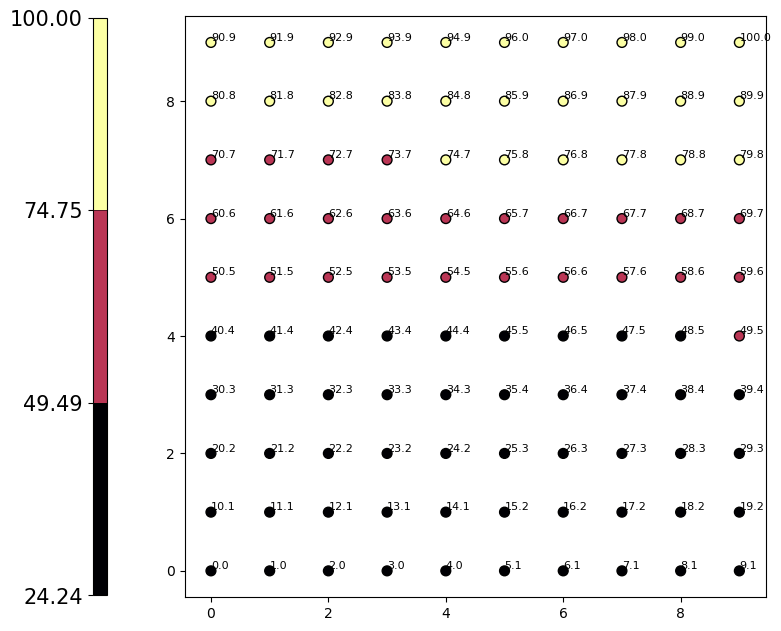

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(
    ax=ax,
    column='value',
    cmap=cmap,
    norm=norm,
    markersize=50,
    edgecolor='black'
)

# annotate each point with its value
for x, y, val in zip(gdf.geometry.x, gdf.geometry.y, gdf['value']):
    ax.text(
        x, y,
        f"{val:.1f}",
        fontsize=8,
        ha='left',
        va='bottom',
        color='black'
    )

sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(
    sm, ax=ax,
    boundaries=breaks, ticks=breaks,
    orientation='vertical',
    location='left',
    spacing='proportional',
    drawedges=True,
    pad=0.1, aspect=40, shrink=0.75
)
cbar.ax.tick_params(labelsize=15)

plt.show()

## Workaround

In [5]:
jenks = mapclassify.NaturalBreaks(gdf['value'], k=4)
breaks = jenks.bins

# >>> Add the minimum value to the breaks <<<
breaks_with_min = np.insert(breaks, 0, gdf['value'].min())

cmap = plt.get_cmap('inferno')
norm_with_min = BoundaryNorm(boundaries=breaks_with_min, ncolors=cmap.N)

print("NaturalBreaks bins with min:", breaks_with_min)

NaturalBreaks bins with min: [  0.          24.24242424  48.48484848  73.73737374 100.        ]


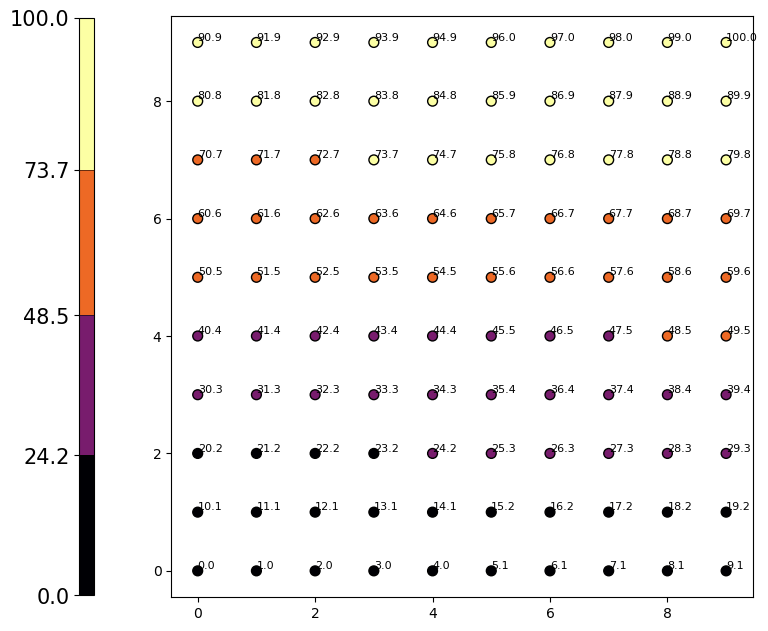

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(
    ax=ax,
    column='value',
    cmap=cmap,
    norm=norm_with_min,
    markersize=50,
    edgecolor='black'
)

# annotate each point with its value
for x, y, val in zip(gdf.geometry.x, gdf.geometry.y, gdf['value']):
    ax.text(
        x, y,
        f"{val:.1f}",
        fontsize=8,
        ha='left',
        va='bottom',
        color='black'
    )

sm = ScalarMappable(norm=norm_with_min, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(
    sm, ax=ax,
    boundaries=breaks_with_min, ticks=breaks_with_min,
    orientation='vertical',
    location='left',
    spacing='proportional',
    drawedges=True,
    pad=0.1, aspect=40, shrink=0.75
)
cbar.ax.tick_params(labelsize=15)

plt.show()